# Trabajo Final

## Twitter e Incendios Forestales en el sur de Chile

In [1]:
import pandas as pd 
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 150

In [2]:
data = pd.read_csv('Data/mapuche.csv', sep=",", encoding='latin1')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809 entries, 0 to 1808
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   source     1809 non-null   object
 1   target     1809 non-null   object
 2   weight     1809 non-null   int64 
 3   First_met  1809 non-null   object
 4   End_met    1809 non-null   object
 5   Label      1809 non-null   object
 6   Link       1809 non-null   object
dtypes: int64(1), object(6)
memory usage: 99.1+ KB


In [3]:
G = nx.DiGraph()
G = nx.from_pandas_edgelist(data, source="source", target="target",create_using=G)

In [4]:
N = len(G)
L = G.size()
degrees = list(dict(G.degree()).values())
kmin = min(degrees)
kmax = max(degrees)
print("Número de nodos: ", N)
print("Número de enlaces: ", L)
print('-------')
print("Grado promedio (alternativa de calculo)", np.mean(degrees))
print('-------')
print("Grado mínimo: ", kmin)
print("Grado máximo: ", kmax)

Número de nodos:  979
Número de enlaces:  1477
-------
Grado promedio (alternativa de calculo) 3.017364657814096
-------
Grado mínimo:  1
Grado máximo:  351


In [14]:
degrees = list(dict(G.degree()).values())
np.mean(degrees)

3.017364657814096

In [11]:
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    """Return a list of the frequency of each degree value.

    Parameters
    ----------
    G : Networkx graph
       A graph
    in_degree : bool
    out_degree : bool

    Returns
    -------
    hist : list
       A list of frequencies of degrees.
       The degree values are the index in the list.

    Notes
    -----
    Note: the bins are width one, hence len(list) can be large
    (Order(number_of_edges))
    """
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq

Text(0, 0.5, 'Frequency')

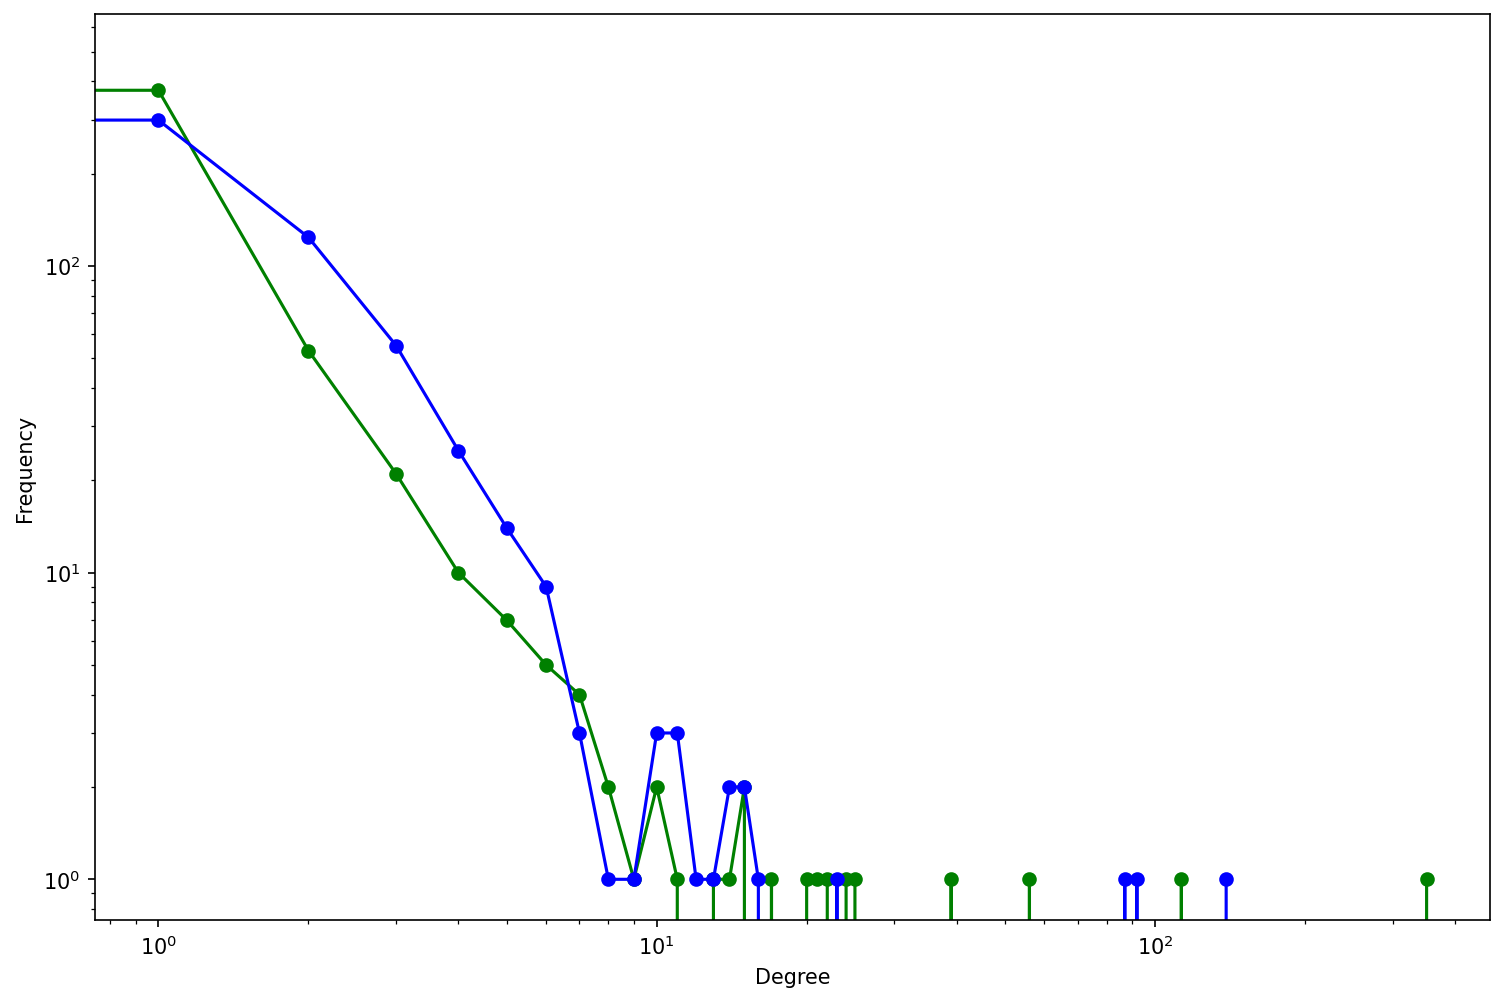

In [12]:
in_degree_freq = degree_histogram_directed(G, in_degree=True)
out_degree_freq = degree_histogram_directed(G, out_degree=True)
degrees = range(len(in_degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')

/var/folders/l4/br6xdwsn3wj7ntybwy6zwmvh0000gn/T/ipykernel_15801/359249553.py:5: RuntimeWarning: divide by zero encountered in log10
  bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=20)
/Users/fabianalexis/opt/anaconda3/envs/ciencia-de-redes/lib/python3.9/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/fabianalexis/opt/anaconda3/envs/ciencia-de-redes/lib/python3.9/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start


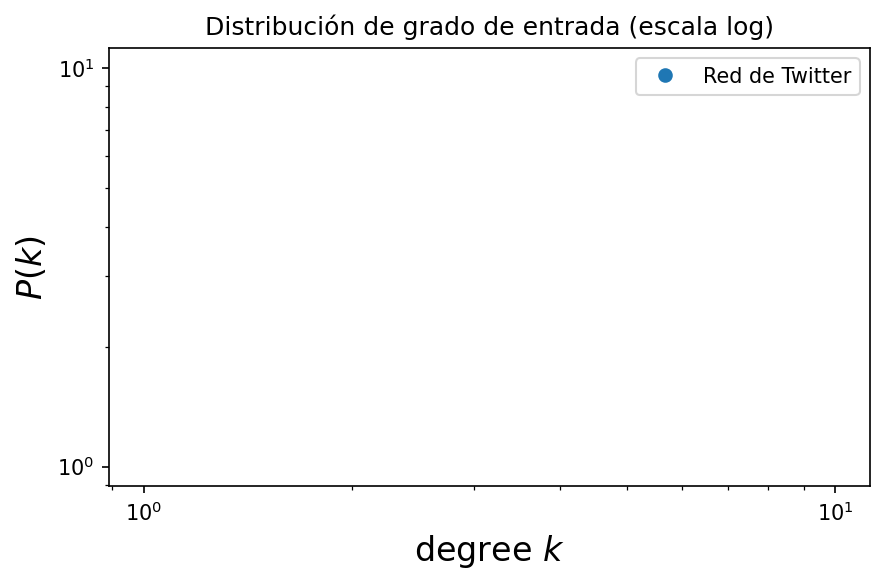

In [104]:
degrees = list(dict(G.degree()).values())
kmin = min(degrees)
kmax = max(degrees)
# Generamos 10 bins espaciados logaritmicamente entre kmin y kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=20)

# histograma de la data para esos bines
density, _ = np.histogram(degrees, bins=bin_edges, density=True)
fig = plt.figure(figsize=(6,4))

# "x" debe ser el punto medio (en escala LOG) de cada bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')

plt.legend(['Red de Twitter'])
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

plt.title('Distribución de grado (escala log)')

plt.tight_layout()
plt.show()

# Degree red vs aleatoria

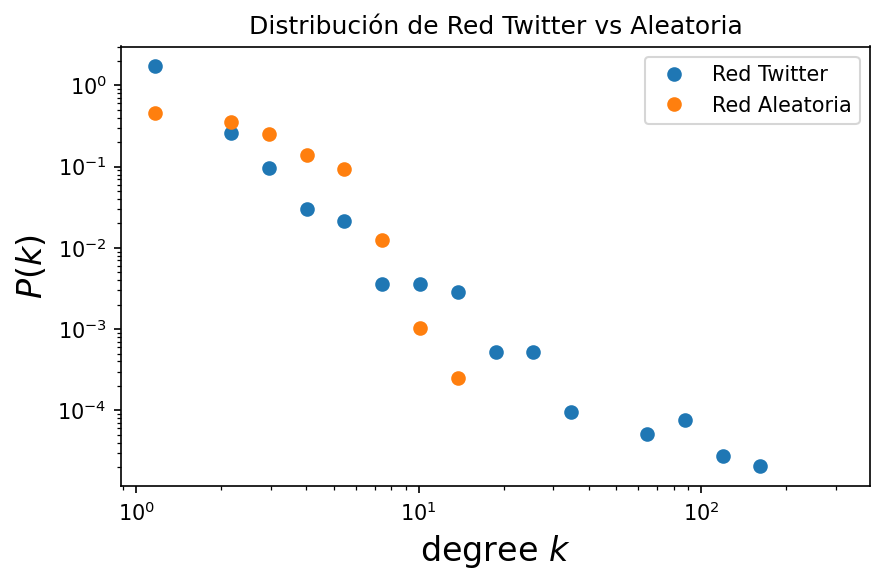

In [83]:
G_random = nx.gnm_random_graph(n=979, m=1477, seed=123)
degree_g = list(dict(G_random.degree()).values())
#kmin = 1
#kmax = max(degree_g)
# Generamos 10 bins espaciados logaritmicamente entre kmin y kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=20)
density2, _ = np.histogram(degree_g, bins=bin_edges, density=True)
fig = plt.figure(figsize=(6,4))

# "x" debe ser el punto medio (en escala LOG) de cada bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)


plt.loglog(x, density, marker='o', linestyle='none')
plt.loglog(x, density2, marker='o', linestyle='none')
plt.legend(['Red Twitter', 'Red Aleatoria'])

plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

plt.title('Distribución de Red Twitter vs Aleatoria')

plt.tight_layout()
plt.show()


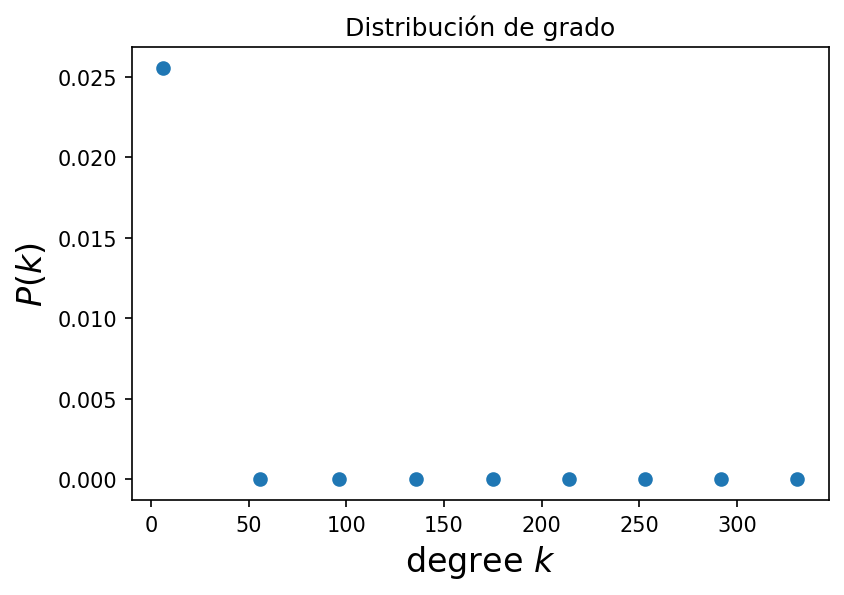

In [71]:
# Entrega 20 bins linealmente espaceados entre kmin y kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histograma de la data en estos bines 
density, _ = np.histogram(degrees, bins=bin_edges, density=True)
fig = plt.figure(figsize=(6,4))

# "x" debería ser el punto meido (en escala lineal) de cada bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
plt.title('Distribución de grado')

# Muestra la gráfica
plt.show()

/var/folders/l4/br6xdwsn3wj7ntybwy6zwmvh0000gn/T/ipykernel_15801/1693151977.py:5: RuntimeWarning: divide by zero encountered in log10
  bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=20)
/Users/fabianalexis/opt/anaconda3/envs/ciencia-de-redes/lib/python3.9/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/fabianalexis/opt/anaconda3/envs/ciencia-de-redes/lib/python3.9/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start


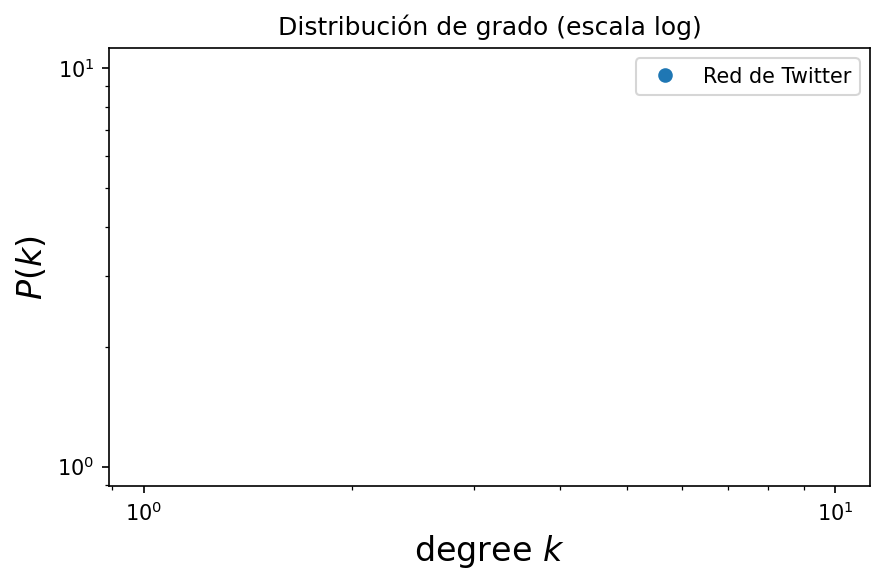

In [90]:

degrees = list(dict(G.in_degree()).values())
kmin = min(degrees)
kmax = max(degrees)
# Generamos 10 bins espaciados logaritmicamente entre kmin y kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=20)

# histograma de la data para esos bines
density, _ = np.histogram(degrees, bins=bin_edges, density=True)
fig = plt.figure(figsize=(6,4))

# "x" debe ser el punto medio (en escala LOG) de cada bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')

plt.legend(['Red de Twitter'])
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

plt.title('Distribución de grado (escala log)')

plt.tight_layout()
plt.show()

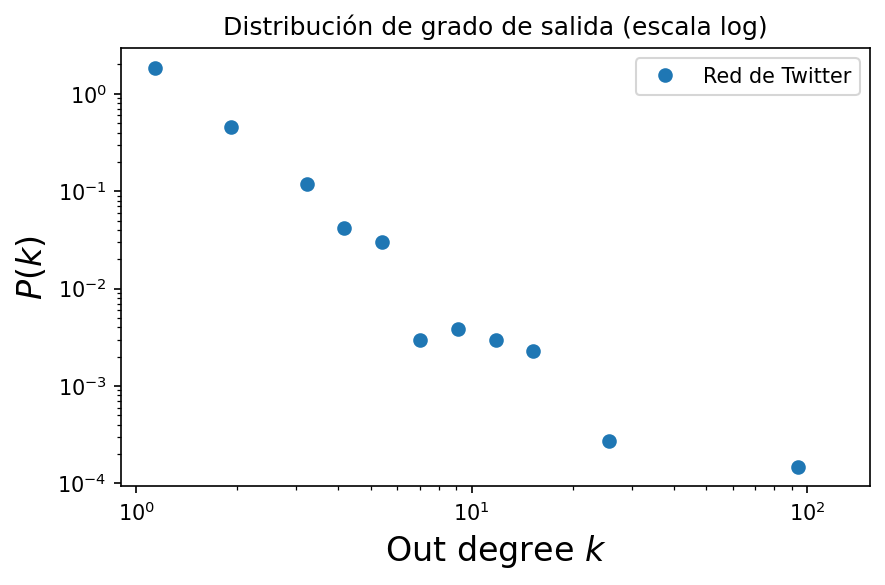

In [103]:

degrees = list(dict(G.out_degree()).values())
degrees
kmin = 1
kmax = max(degrees)
# Generamos 10 bins espaciados logaritmicamente entre kmin y kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=20)

# histograma de la data para esos bines
density, _ = np.histogram(degrees, bins=bin_edges, density=True)
fig = plt.figure(figsize=(6,4))

# "x" debe ser el punto medio (en escala LOG) de cada bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')

plt.legend(['Red de Twitter'])
plt.xlabel(r"Out degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

plt.title('Distribución de grado de salida (escala log)')

plt.tight_layout()
plt.show()

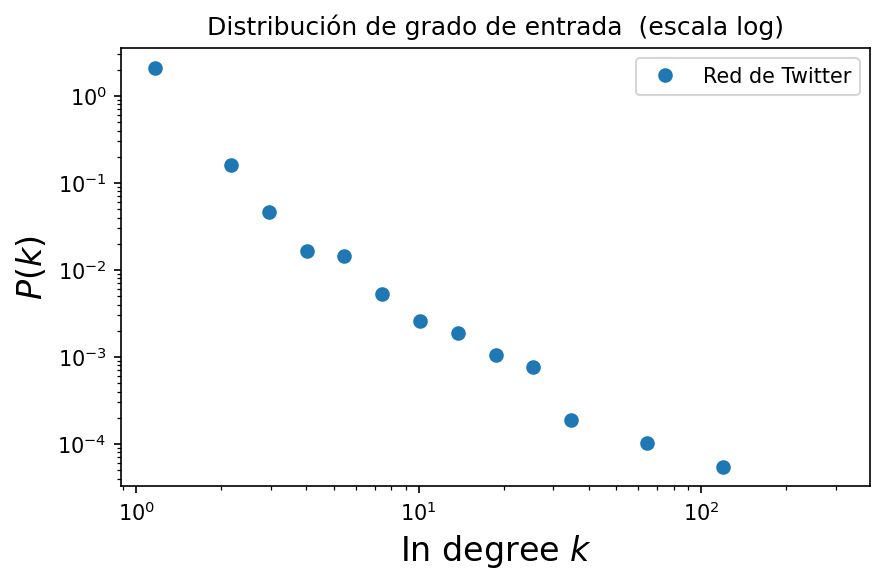

In [105]:

degrees = list(dict(G.in_degree()).values())
degrees
kmin = 1
kmax = max(degrees)
# Generamos 10 bins espaciados logaritmicamente entre kmin y kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=20)

# histograma de la data para esos bines
density, _ = np.histogram(degrees, bins=bin_edges, density=True)
fig = plt.figure(figsize=(6,4))

# "x" debe ser el punto medio (en escala LOG) de cada bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')

plt.legend(['Red de Twitter'])
plt.xlabel(r"In degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

plt.title('Distribución de grado de entrada  (escala log)')

plt.tight_layout()
plt.show()

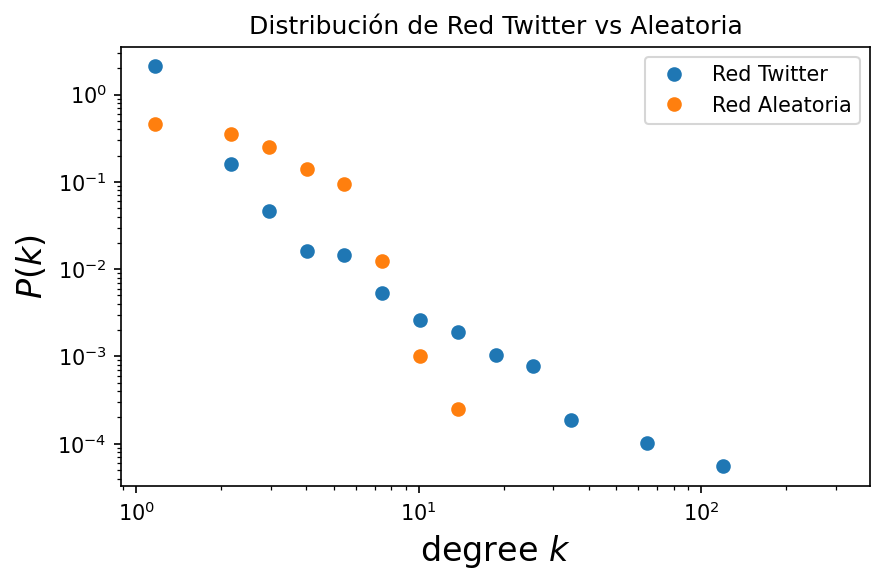

In [106]:
G_random = nx.gnm_random_graph(n=979, m=1477, seed=123)
degree_g = list(dict(G_random.degree()).values())
#kmin = 1
#kmax = max(degree_g)
# Generamos 10 bins espaciados logaritmicamente entre kmin y kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=20)
density2, _ = np.histogram(degree_g, bins=bin_edges, density=True)
fig = plt.figure(figsize=(6,4))

# "x" debe ser el punto medio (en escala LOG) de cada bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)


plt.loglog(x, density, marker='o', linestyle='none')
plt.loglog(x, density2, marker='o', linestyle='none')
plt.legend(['Red Twitter', 'Red Aleatoria'])

plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

plt.title('Distribución de Red Twitter vs Aleatoria')

plt.tight_layout()
plt.show()

In [110]:
nx.algorithms.generic.average_shortest_path_length(G)

0.01053618838136657

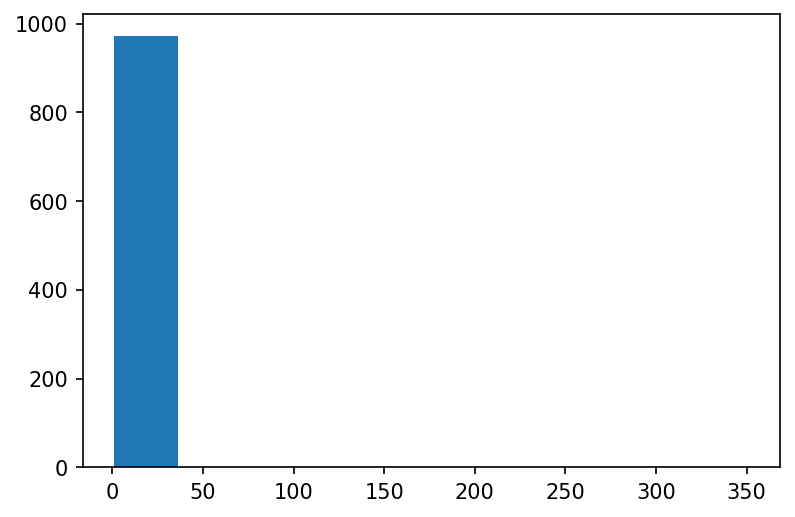

In [117]:
# Plot a histogram of degree centrality
plt.hist(list(dict(nx.degree(G)).values()))
plt.show()

# Distribución de grado vs coeficiente de Clustering

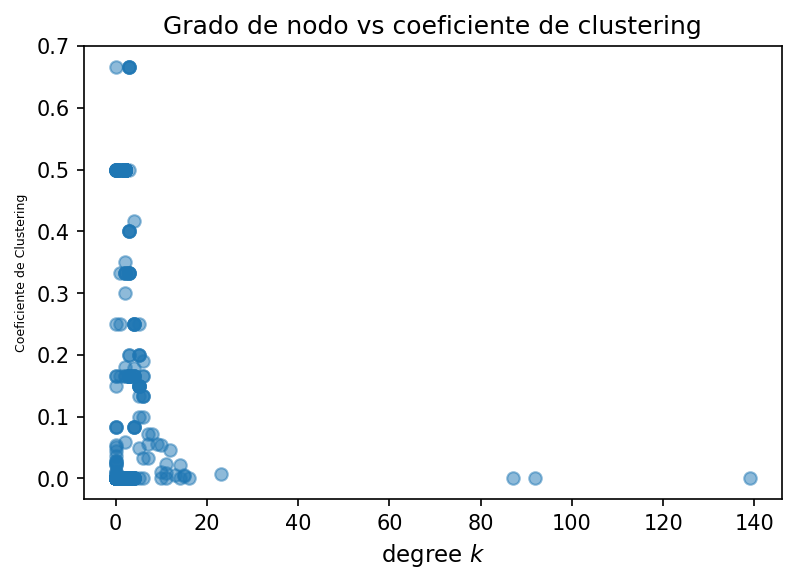

In [125]:
degree_g =  dict(G.out_degree())
clustering_g=dict(nx.clustering(G))

x = degree_g.values()
y = clustering_g.values()

plt.xlabel(r"degree $k$", fontsize=11)
plt.ylabel(r"Coeficiente de Clustering", fontsize=6)
plt.title('Grado de nodo vs coeficiente de clustering')
plt.scatter(x, y, alpha=0.5)

plt.show()


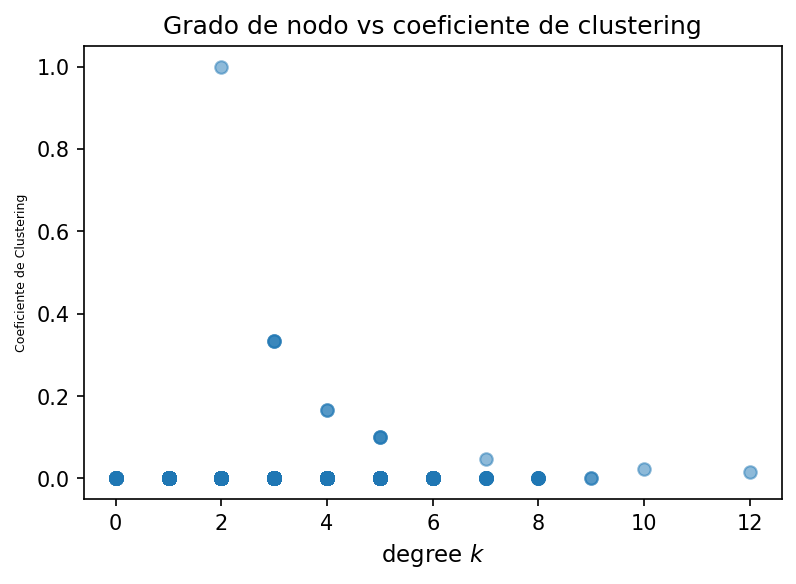

In [16]:
G_random = nx.gnm_random_graph(n=979, m=1477, seed=123)
degree_g =  dict(G_random.degree())
clustering_g=dict(nx.clustering(G_random))

x = degree_g.values()
y = clustering_g.values()

plt.xlabel(r"degree $k$", fontsize=11)
plt.ylabel(r"Coeficiente de Clustering", fontsize=6)
plt.title('Grado de nodo vs coeficiente de clustering')
plt.scatter(x, y, alpha=0.5)

plt.show()

dict_values([0, 0, 0, 0, 0, 0.047619047619047616, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.16666666666666666, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.022222222222222223, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0